# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('ass4-original.pkl')

comedians = []
for index ,comedian in enumerate(data.index):
    comedians.append(comedian)

data['name'] = comedians
data

,transcript,name
andrew,andrew santino cheeseburger transcript scr...,andrew
bert,bert kreischer razzle dazzle transcript sc...,bert
catherine,catherine cohen the twist shes gorgeous tra...,catherine
dave,dave chappelle the age of spin transcript ...,dave
deon,deon cole charleens boy transcript scraps ...,deon
gary,gary gulman its about time transcript scra...,gary
jared,jared freid and single transcript scraps ...,jared
kathleen,kathleen madigan bothering jesus transcript...,kathleen
kevin,kevin james irregardless transcript scraps...,kevin
leanne,leanne morgan im every woman transcript sc...,leanne


In [2]:
!pip install textblob

In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: 
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data


,transcript,name,polarity,subjectivity
andrew,andrew santino cheeseburger transcript scr...,andrew,0.008778,0.541327
bert,bert kreischer razzle dazzle transcript sc...,bert,-0.017754,0.516283
catherine,catherine cohen the twist shes gorgeous tra...,catherine,0.072244,0.565698
dave,dave chappelle the age of spin transcript ...,dave,0.001943,0.512534
deon,deon cole charleens boy transcript scraps ...,deon,-0.012818,0.547248
gary,gary gulman its about time transcript scra...,gary,0.116115,0.526831
jared,jared freid and single transcript scraps ...,jared,0.015089,0.509563
kathleen,kathleen madigan bothering jesus transcript...,kathleen,0.040981,0.493638
kevin,kevin james irregardless transcript scraps...,kevin,0.087243,0.498387
leanne,leanne morgan im every woman transcript sc...,leanne,0.116035,0.496952


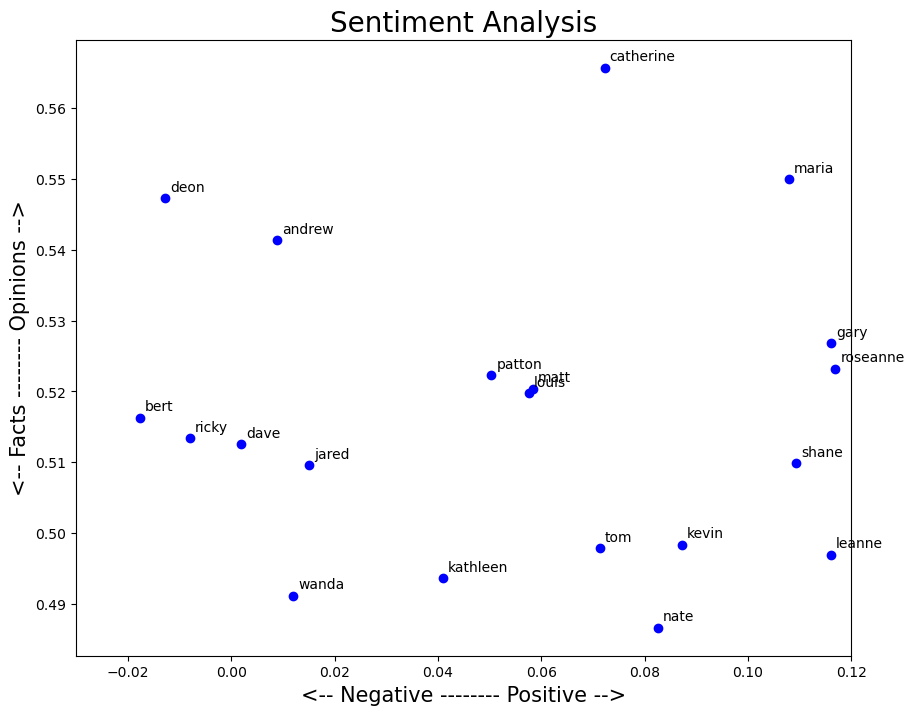

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['name'][index], fontsize=10)
    plt.xlim(-.03, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data.transcript

andrew        andrew santino cheeseburger   transcript  scr...
bert          bert kreischer razzle dazzle   transcript  sc...
catherine     catherine cohen the twist shes gorgeous   tra...
dave          dave chappelle the age of spin   transcript  ...
deon          deon cole charleens boy   transcript  scraps ...
gary          gary gulman its about time   transcript  scra...
jared         jared freid  and single   transcript  scraps ...
kathleen      kathleen madigan bothering jesus   transcript...
kevin         kevin james irregardless   transcript  scraps...
leanne        leanne morgan im every woman   transcript  sc...
louis         louis ck oh my god   transcript  scraps from ...
maria         maria bamford the special special special   t...
matt          matt rife natural selection   transcript  scr...
nate          nate bargatze the greatest average american  ...
patton        patton oswalt we all scream   transcript  scr...
ricky         ricky gervais armageddon   transcript  sc

In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' andrew santino cheeseburger   transcript  scraps from the loft  \r\t\tskip to content moviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  menumoviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks search search moviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  menumoviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks search searchcomedy andrew santino cheeseburger   transcript \t\t\t\t\t\t\t\t\t\tseptember  \t\t\t\t\t\t\t\tno topic is safe in this unfiltered standu

In [8]:
# The list has 10 elements, one for each transcript
len(list_pieces)

20

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11336527293844365,
  -0.02028806584362139,
  0.10941080977845685,
  0.002217838911387299,
  -0.08009025763880133,
  -0.03743456156246855,
  0.13155281629857898,
  -0.14864559712774006,
  0.054884004884004904,
  0.09589190651690653],
 [0.037171052631578966,
  -0.013573318216175365,
  -0.01905458089668617,
  -0.12563605984658616,
  0.06707818930041151,
  -0.09637408197109691,
  0.03254719817219817,
  0.0736151603498542,
  -0.1524633123689728,
  0.07413165266106443],
 [0.23078440656565657,
  0.10010162601626017,
  0.07579289582966056,
  0.017352328909705977,
  0.14601382488479256,
  -0.08087849650349647,
  0.09864838864838862,
  -0.029126468769325915,
  0.09403588379491996,
  0.07757526564344745],
 [-0.0408240959377323,
  -0.07812222024550793,
  0.050460477793811125,
  0.06595408976987924,
  -0.02502834467120182,
  0.08529103060682007,
  -0.11873943516800656,
  -0.09602474747474748,
  -0.01860370870111129,
  0.20930114638447972],
 [0.1883473952351502,
  -0.10914067525513309,
  0.00211

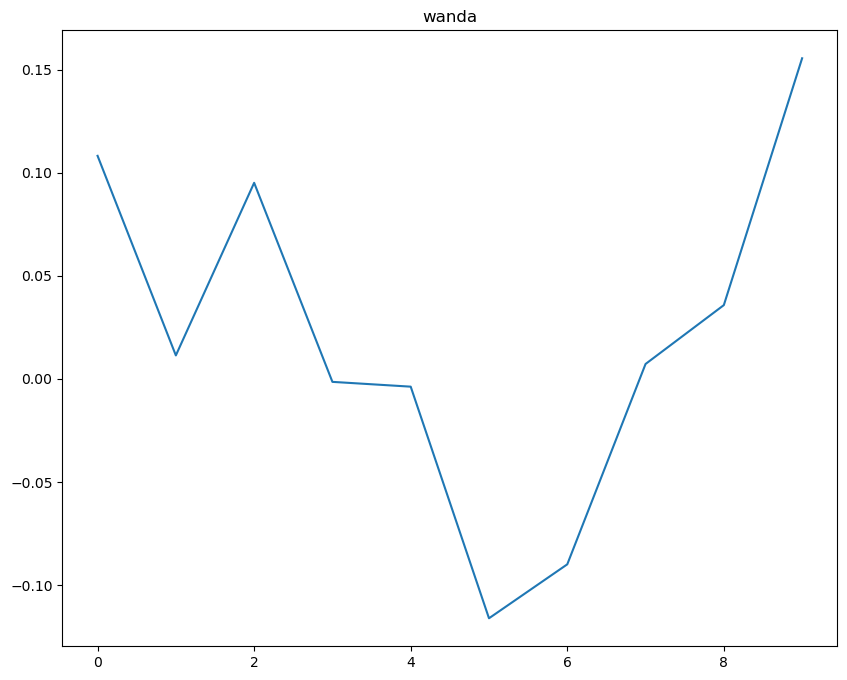

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[19])
plt.title(data['name'].index[19])
plt.show()

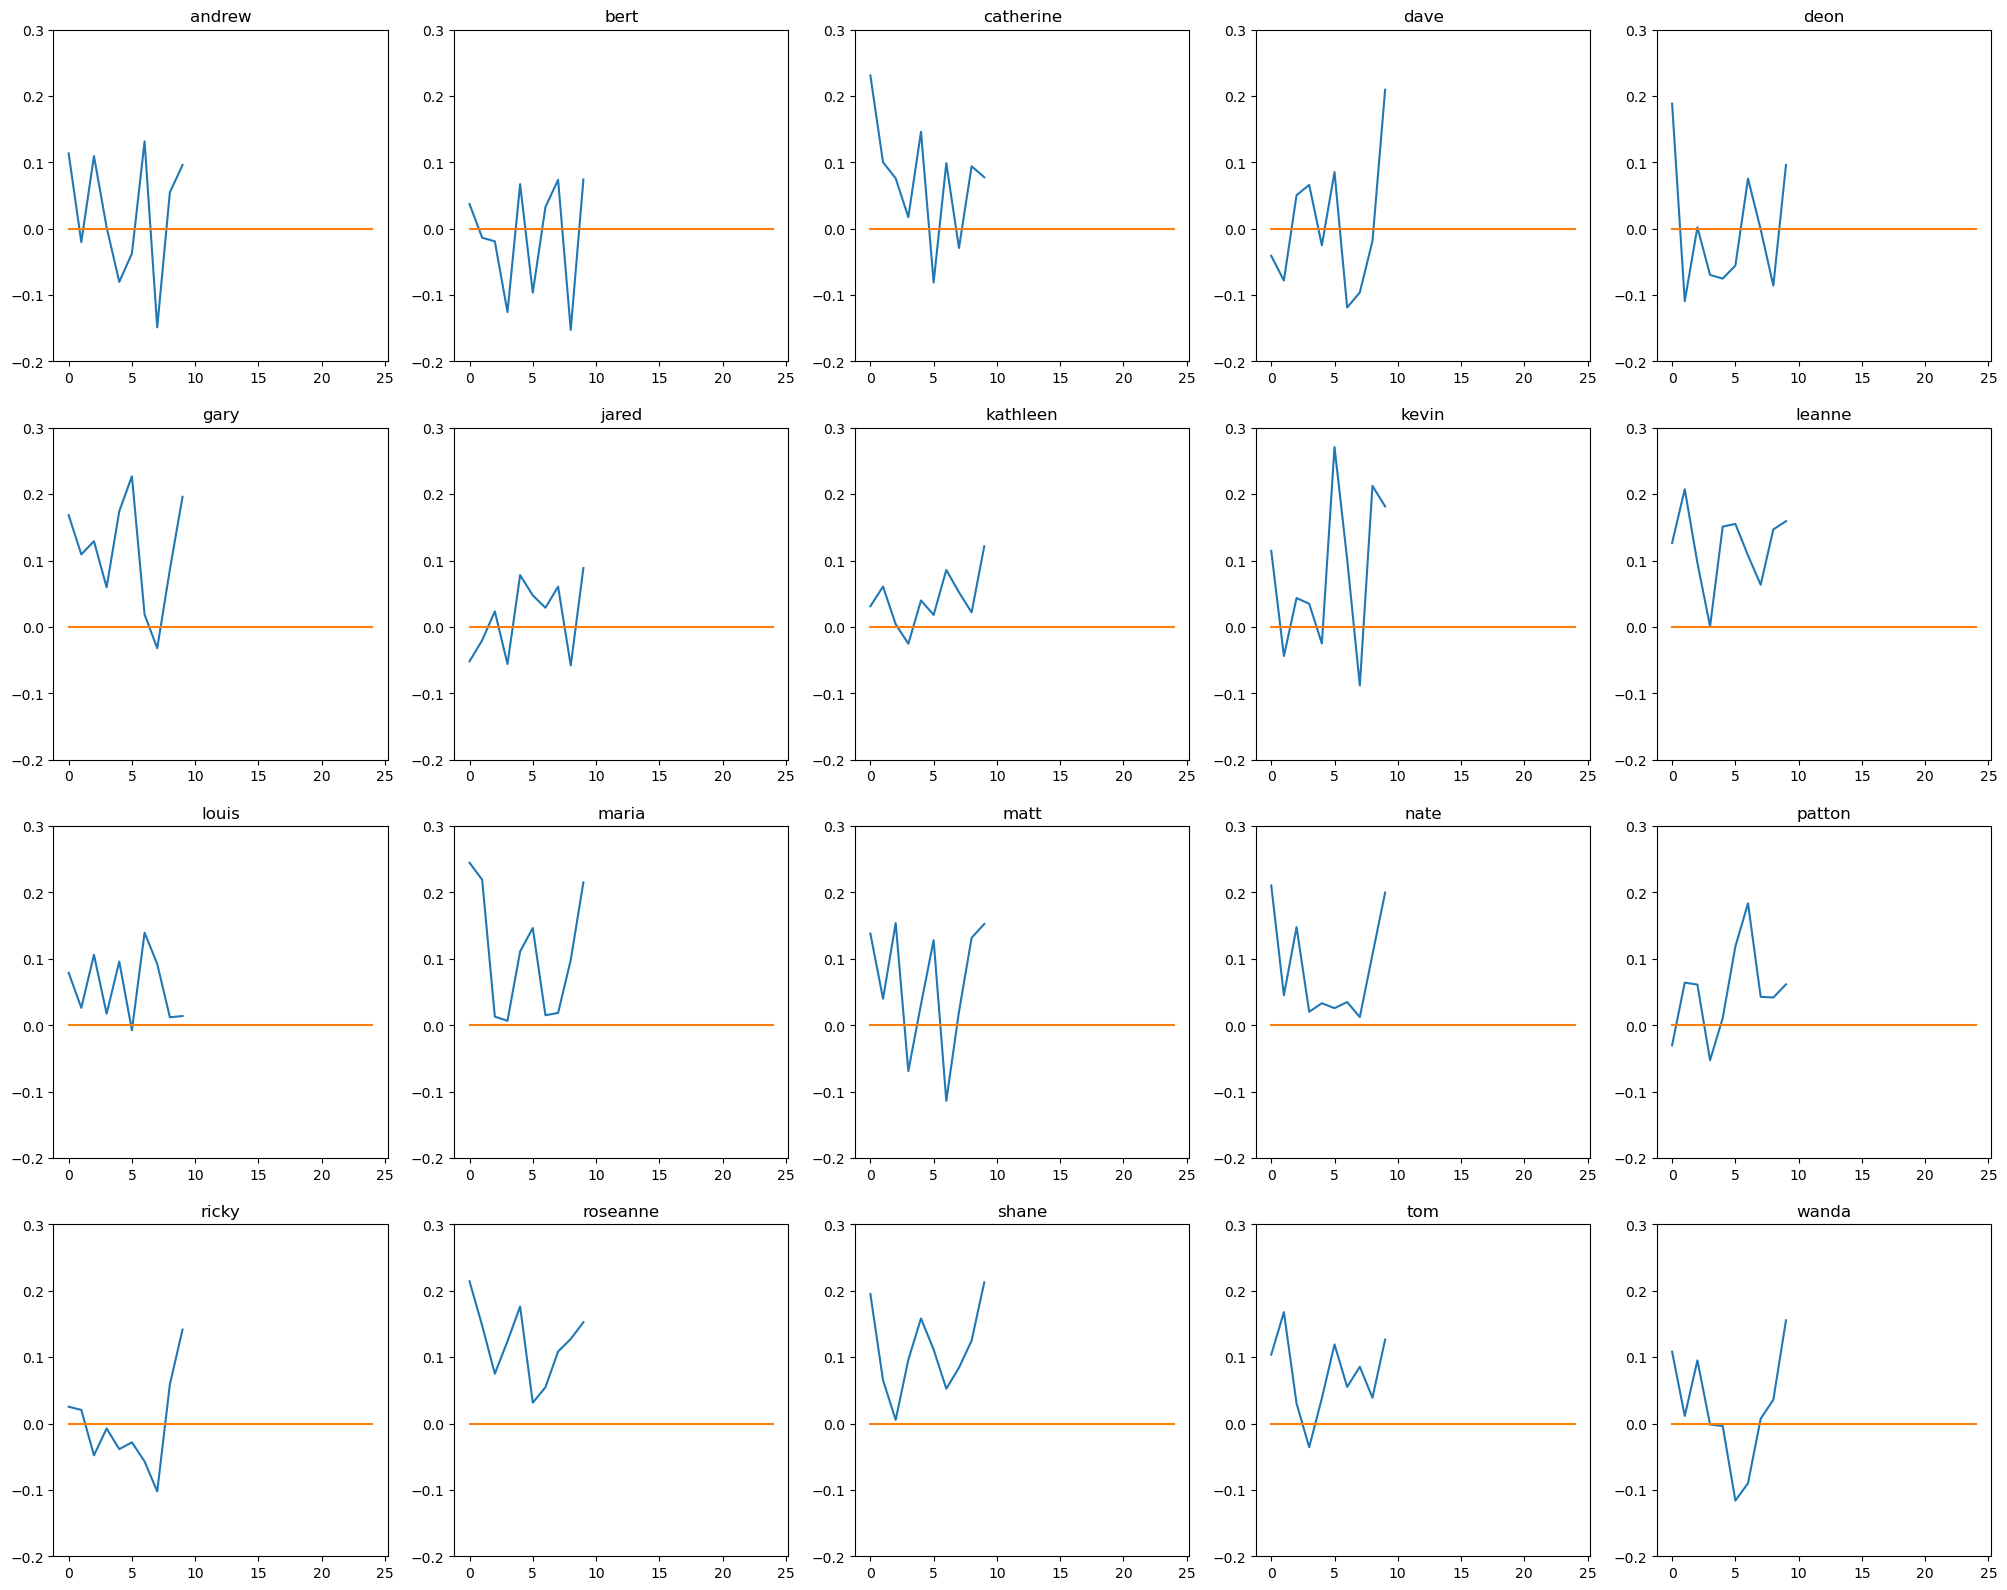

In [12]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [25, 25]

for index, comedian in enumerate(data.index):    
    plt.subplot(5, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,25), np.zeros(25))
    plt.title(data['name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


# Assignment 1

## Classification according to Polarity and Subjectivity

In [45]:
data

,transcript,name,polarity,subjectivity
andrew,andrew santino cheeseburger transcript scr...,andrew,0.008778,0.541327
bert,bert kreischer razzle dazzle transcript sc...,bert,-0.017754,0.516283
catherine,catherine cohen the twist shes gorgeous tra...,catherine,0.072244,0.565698
dave,dave chappelle the age of spin transcript ...,dave,0.001943,0.512534
deon,deon cole charleens boy transcript scraps ...,deon,-0.012818,0.547248
gary,gary gulman its about time transcript scra...,gary,0.116115,0.526831
jared,jared freid and single transcript scraps ...,jared,0.015089,0.509563
kathleen,kathleen madigan bothering jesus transcript...,kathleen,0.040981,0.493638
kevin,kevin james irregardless transcript scraps...,kevin,0.087243,0.498387
leanne,leanne morgan im every woman transcript sc...,leanne,0.116035,0.496952


In [46]:
#dividing into 3 categoried based upon polarity and subjectivity respectively

total_comedian = 20
wanted_category = 3

#sorting data based on polarity column and subjectivty column
data_sort_polarity = data.sort_values(by = 'polarity')
data_sort_subjectivity = data.sort_values(by = 'subjectivity')

for i in range(0,7):
    data_sort_polarity['category'] = 'low'
    data_sort_subjectivity['category'] ='low'
for i in range(7,14):
    data_sort_polarity.iloc[i,-1] = 'medium'
    data_sort_subjectivity.iloc[i,-1] ='medium'
for i in range(14,20):
    data_sort_polarity.iloc[i ,-1] = 'high'
    data_sort_subjectivity.iloc[i,-1] ='high'
    

In [47]:
data_sort_polarity

,transcript,name,polarity,subjectivity,category
bert,bert kreischer razzle dazzle transcript sc...,bert,-0.017754,0.516283,low
deon,deon cole charleens boy transcript scraps ...,deon,-0.012818,0.547248,low
ricky,ricky gervais armageddon transcript scraps...,ricky,-0.008030,0.513364,low
dave,dave chappelle the age of spin transcript ...,dave,0.001943,0.512534,low
andrew,andrew santino cheeseburger transcript scr...,andrew,0.008778,0.541327,low
wanda,wanda sykes im an entertainer transcript s...,wanda,0.012017,0.491159,low
jared,jared freid and single transcript scraps ...,jared,0.015089,0.509563,low
kathleen,kathleen madigan bothering jesus transcript...,kathleen,0.040981,0.493638,medium
patton,patton oswalt we all scream transcript scr...,patton,0.050337,0.522256,medium
louis,louis ck oh my god transcript scraps from ...,louis,0.057536,0.519720,medium


In [48]:
data_sort_subjectivity

,transcript,name,polarity,subjectivity,category
nate,nate bargatze the greatest average american ...,nate,0.082502,0.486640,low
wanda,wanda sykes im an entertainer transcript s...,wanda,0.012017,0.491159,low
kathleen,kathleen madigan bothering jesus transcript...,kathleen,0.040981,0.493638,low
leanne,leanne morgan im every woman transcript sc...,leanne,0.116035,0.496952,low
tom,tom segura sledgehammer transcript scraps ...,tom,0.071291,0.497826,low
kevin,kevin james irregardless transcript scraps...,kevin,0.087243,0.498387,low
jared,jared freid and single transcript scraps ...,jared,0.015089,0.509563,low
shane,shane gillis live in austin transcript scra...,shane,0.109289,0.509869,medium
dave,dave chappelle the age of spin transcript ...,dave,0.001943,0.512534,medium
ricky,ricky gervais armageddon transcript scraps...,ricky,-0.008030,0.513364,medium


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd


df = data_sort_subjectivity

fig = px.scatter(df, x='name', y='subjectivity', color='subjectivity', facet_col='category', 
                 labels={'X': 'X', 'Y': 'Y', 'Class': 'Class', 'Group': 'Group'},
                 title='Scatter Plots Divided into Facets Based on "Subjectivity" Column')
fig.show()

In [50]:

df2 = data_sort_polarity

fig = px.scatter(df2, x='name', y='polarity', color='subjectivity', facet_col='category', 
                 labels={'X': 'X', 'Y': 'Y', 'Class': 'Class', 'Group': 'Group'},
                 title='Scatter Plots Divided into Facets Based on "Polarity" Column')
fig.show()

# Assignment 2